<a href="https://colab.research.google.com/github/AsrarH/Transfer_learning-/blob/master/transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-26 10:53:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 173.194.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   110MB/s    in 0.6s    

2020-07-26 10:53:53 (110 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
pip install tensorflow

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

In [13]:
base_dir = '/tmp/cats_and_dogs_filtered' 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
     features = np.zeros(shape=(sample_count, 4, 4, 512))
     labels = np.zeros(shape=(sample_count))
     generator = datagen.flow_from_directory(
         directory,
         target_size=(150, 150),
         batch_size=batch_size,
         class_mode='binary')
     conv_base = VGG16(weights='imagenet',
                  # do not include the top, fully-connected Dense layers 
                  include_top=False,
                  input_shape=(150, 150, 3))
     i = 0
     for inputs_batch, labels_batch in generator:
         features_batch = conv_base.predict(inputs_batch)
         features[i * batch_size : (i + 1) * batch_size] = features_batch
         labels[i * batch_size : (i + 1) * batch_size] = labels_batch
         i += 1
         if i * batch_size >= sample_count:
             break
     return features, labels

In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [14]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [18]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
 
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
               loss='binary_crossentropy',
               metrics=['acc'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(train_features, train_labels,
                     epochs=30,
                     batch_size=20,
                     validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5780 - acc: 0.6845 - val_loss: 0.4375 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4215 - acc: 0.8070 - val_loss: 0.3633 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3558 - acc: 0.8365 - val_loss: 0.3266 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3176 - acc: 0.8705 - val_loss: 0.3083 - val_acc: 0.8730
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2858 - acc: 0.8845 - val_loss: 0.2946 - val_acc: 0.8790
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2671 - acc: 0.8875 - val_loss: 0.2850 - val_acc: 0.8780
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2480 - acc: 0.8990 - val_loss: 0.2808 - val_acc: 0.8820
Epoch 8/30
200

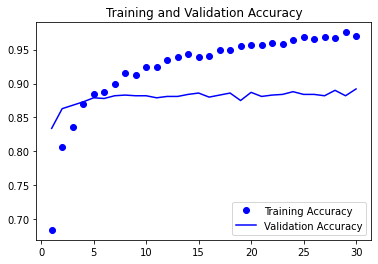

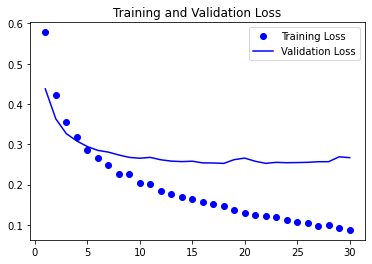

In [25]:
import matplotlib.pyplot as plt
 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
 
plt.figure()

 
plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

 
plt.show()